In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kepler/cumulative.csv


In [2]:
df=pd.read_csv('/kaggle/input/kepler/cumulative.csv')
pd.set_option('display.max_columns', None)


In [3]:
df.sample(20)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
9352,9353,11912932,K03085.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,1,1,3.747854,2.324000e-05,-2.324000e-05,134.180120,0.005050,-0.005050,0.468,0.491,-0.2710,3.71300,0.14800,-0.14800,98.2,6.0,-6.0,0.89,0.25,-0.08,1093.0,NaN,NaN,337.14,273.73,-88.04,18.8,1.0,q1_q17_dr25_tce,5706.0,156.0,-156.0,4.537,0.036,-0.192,0.886,0.244,-0.081,290.97250,50.267948,14.323
5093,5094,7866921,K03360.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,91.499998,5.537000e-05,-5.537000e-05,182.769045,0.000499,-0.000499,0.736,0.002,-0.0030,19.58180,0.02970,-0.02970,65496.0,131.0,-131.0,21.86,3.17,-1.95,335.0,NaN,NaN,2.98,1.42,-0.76,1018.4,1.0,q1_q17_dr25_tce,5263.0,158.0,-142.0,4.572,0.045,-0.091,0.774,0.112,-0.069,279.85608,43.667900,14.801
18,19,10526549,K00746.01,Kepler-660 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.273582,1.037000e-05,-1.037000e-05,173.258155,0.000877,-0.000877,0.387,0.004,-0.3860,3.28750,0.03090,-0.03090,1288.3,16.8,-16.8,2.47,0.20,-0.24,649.0,NaN,NaN,41.85,12.49,-11.70,87.2,1.0,q1_q17_dr25_tce,4856.0,131.0,-146.0,4.583,0.065,-0.035,0.696,0.056,-0.068,288.13824,47.724449,15.302
7780,7781,2973509,K06300.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1,0,0,0,6.627612,2.690000e-07,-2.690000e-07,132.546638,0.000033,-0.000033,0.753,0.008,-0.0150,6.15281,0.00132,-0.00132,227140.0,29.2,-29.2,82.03,25.17,-16.80,1204.0,NaN,NaN,496.41,439.42,-218.43,4355.5,1.0,q1_q17_dr25_tce,6316.0,158.0,-189.0,4.231,0.180,-0.180,1.333,0.409,-0.273,287.02570,38.171021,13.558
5305,5306,2854948,K03786.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,0.974303,3.440000e-07,-3.440000e-07,132.390205,0.000313,-0.000313,1.169,0.255,-0.1360,2.10880,0.01490,-0.01490,34976.0,192.0,-192.0,37.62,9.34,-3.11,1643.0,NaN,NaN,1728.18,1339.90,-457.87,224.0,2.0,q1_q17_dr25_tce,5688.0,189.0,-189.0,4.583,0.040,-0.160,0.786,0.195,-0.065,291.98416,38.088371,15.783
7369,7370,8316503,K07019.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,5.065330,1.290000e-07,-1.290000e-07,134.981916,0.000021,-0.000021,0.725,0.012,-0.0070,4.90392,0.00071,-0.00071,155610.0,24.0,-24.0,60.35,16.94,-12.34,1315.0,NaN,NaN,705.60,580.75,-314.53,5497.0,1.0,q1_q17_dr25_tce,6350.0,170.0,-207.0,4.233,0.185,-0.185,1.286,0.361,-0.263,297.29782,44.281658,13.955
1392,1393,4743513,K00024.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,1,2.086076,1.392000e-06,-1.392000e-06,170.965627,0.000575,-0.000575,0.914,0.008,-0.0120,2.26470,0.05200,-0.05200,3657.8,53.8,-53.8,10.30,2.08,-3.14,1845.0,NaN,NaN,2747.42,1679.34,-1545.05,102.2,1.0,q1_q17_dr25_tce,6131.0,168.0,-153.0,4.071,0.294,-0.126,1.417,0.287,-0.431,290.81540,39.819469,12.963
2696,2697,2446113,K00379.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.073,0,0,1,0,6.717256,1.155000e-05,-1.155000e-05,170.997330,0.001370,-0.001370,0.163,0.311,-0.1630,2.52070,0.04470,-0.04470,272.7,6.3,-6.3,2.78,0.50,-0.60,1264.0,NaN,NaN,603.71,303.75,-266.08,49.1,1.0,q1_q17_dr25_tce,6078.0,122.0,-134.0,4.094,0.174,-0.116,1.683,0.300,-0.367,292.05676,37.776192,13.319
5875,5876,8161830,K03046.01,NaN,FALSE POSITIVE,FALSE POSITIVE,NaN,0,0,0,0,1.101186,NaN,NaN,132.616920,NaN,NaN,NaN,NaN,NaN,5.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.41016,44.063541,13.308
2014,2015,12216278,K02565.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.001,0,0,1,0,2.019486,1.644000e-05,-1.644000e-05,132.923800,0.007300

In [4]:
df.shape

(9564, 50)

First, we have to remove those rows which koi_disposition have value other than 'FALSE POSITIVE' or 'CONFIRMED'.

In [5]:
df.koi_disposition.value_counts()

koi_disposition
FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: count, dtype: int64

In [6]:
df = df[df['koi_disposition'] != 'CANDIDATE']

In [7]:
df.koi_disposition.value_counts()

koi_disposition
FALSE POSITIVE    5023
CONFIRMED         2293
Name: count, dtype: int64

In [8]:
df.isnull().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          5022
koi_disposition         0
koi_pdisposition        0
koi_score            1059
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       377
koi_period_err2       377
koi_time0bk             0
koi_time0bk_err1      377
koi_time0bk_err2      377
koi_impact            300
koi_impact_err1       377
koi_impact_err2       377
koi_duration            0
koi_duration_err1     377
koi_duration_err2     377
koi_depth             300
koi_depth_err1        377
koi_depth_err2        377
koi_prad              300
koi_prad_err1         300
koi_prad_err2         300
koi_teq               300
koi_teq_err1         7316
koi_teq_err2         7316
koi_insol             259
koi_insol_err1        259
koi_insol_err2        259
koi_model_snr         300
koi_tce_plnt_num      279
koi_tce_delivname     279
koi_steff   

There is some column which is of no use. And, there is two more column which cells have no value. They are of no use.

In [9]:
df.drop(['rowid', 'kepid','kepoi_name','kepler_name','koi_teq_err1','koi_teq_err2','koi_pdisposition','koi_tce_delivname'], axis=1, inplace=True)


In [10]:
df.sample(20)

,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
7860,FALSE POSITIVE,0.0,0,1,0,0,14.797219,4.110000e-07,-4.110000e-07,144.695961,0.000023,-0.000023,0.1570,0.0100,0.0000,7.61037,0.00059,-0.00059,252700.0,36.4,-36.4,47.71,14.04,-4.66,787.0,90.80,78.38,-26.16,7795.3,1.0,6343.0,171.0,-209.0,4.495,0.052,-0.208,0.931,0.274,-0.091,292.02866,42.669552,14.185
7564,FALSE POSITIVE,0.0,0,1,0,0,9.543585,2.880000e-07,-2.880000e-07,137.773883,0.000025,-0.000025,0.9850,0.1110,-0.0100,3.72007,0.00177,-0.00177,68184.0,0.7,-0.7,77.97,23.46,-46.96,1141.0,401.55,371.79,-343.86,3442.2,1.0,5537.0,182.0,-132.0,3.837,0.704,-0.176,1.785,0.537,-1.075,296.05179,39.394970,12.256
8174,FALSE POSITIVE,0.0,0,1,0,0,0.773144,3.100000e-08,-3.100000e-08,131.639307,0.000034,-0.000034,0.6940,0.1650,-0.0060,4.05643,0.00580,-0.00580,215960.0,42.8,-42.8,107.13,34.27,-34.27,2860.0,15791.97,14884.97,-9533.28,2947.8,1.0,6413.0,177.0,-243.0,4.038,0.258,-0.172,1.910,0.611,-0.611,295.28845,45.518337,13.833
8299,FALSE POSITIVE,0.0,0,0,1,1,0.648772,4.225000e-06,-4.225000e-06,131.745030,0.005110,-0.005110,0.3680,0.1160,-0.3680,2.61400,0.16800,-0.16800,31.1,2.5,-2.5,2.60,0.48,-0.64,3758.0,47393.05,22372.84,-21954.52,15.0,1.0,4973.0,59.0,-69.0,3.208,0.174,-0.116,4.708,0.871,-1.161,283.78003,40.818779,11.693
6699,FALSE POSITIVE,NaN,1,0,0,0,251.023040,NaN,NaN,194.201186,NaN,NaN,NaN,NaN,NaN,3.11000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.59372,42.871609,13.439
3294,CONFIRMED,1.0,0,0,0,0,12.759345,1.877000e-05,-1.877000e-05,170.321520,0.001190,-0.001190,0.6570,0.1770,-0.4450,3.58890,0.04310,-0.04310,882.1,13.3,-13.3,2.58,0.10,-0.19,633.0,37.95,5.74,-7.22,70.4,1.0,4963.0,81.0,-74.0,4.501,0.072,-0.022,0.826,0.032,-0.060,294.66797,43.853260,14.550
1404,FALSE POSITIVE,0.0,0,1,0,0,137.864588,3.045000e-04,-3.045000e-04,172.811300,0.001720,-0.001720,1.2650,35.1900,-1.3670,1.92200,0.10800,-0.10800,2363.0,106.0,-106.0,15.90,1.41,-2.16,170.0,0.20,0.05,-0.07,28.2,1.0,3645.0,72.0,-90.0,4.797,0.071,-0.038,0.449,0.040,-0.061,296.87683,41.080582,14.645
420,FALSE POSITIVE,0.0,0,0,1,0,13.554805,7.920000e-05,-7.920000e-05,139.816090,0.005410,-0.005410,0.4970,0.4570,-0.2980,2.28800,0.17200,-0.17200,48.3,3.6,-3.6,0.62,0.12,-0.07,679.0,50.41,33.33,-15.75,16.5,2.0,5370.0,187.0,-187.0,4.494,0.074,-0.137,0.874,0.178,-0.096,294.49011,38.194126,11.157
7785,FALSE POSITIVE,0.0,0,1,1,0,2.796661,1.136000e-06,-1.136000e-06,134.032331,0.000335,-0.000335,1.2760,0.2320,-0.1450,3.37810,0.01740,-0.01740,2363.8,11.0,-11.0,47.68,12.26,-15.00,1661.0,1797.72,1404.17,-1060.02,251.4,1.0,6331.0,192.0,-211.0,4.146,0.306,-0.165,1.326,0.341,-0.417,295.99811,39.742748,13.742
7245,FALSE POSITIVE,NaN,1,0,0,0,404.701927,5.711000e-03,-5.711000e-03,196.608900,0.011600,-0.011600,0.2598,0.1773,-0.2598,3.98100,0.45800,-0.45800,236.2,33.1,-33.1,1.94,1.33,-0.28,298.0,1.85,3.93,-0.67,7.8,4.0,6443.0,153.0,-215.0,4.325,0.086,-0.373,1.248,0.855,-0.182,296.58698,43.766918,12.236


We have removed some columns which have no use.

In [11]:
df.isnull().sum()

koi_disposition         0
koi_score            1059
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       377
koi_period_err2       377
koi_time0bk             0
koi_time0bk_err1      377
koi_time0bk_err2      377
koi_impact            300
koi_impact_err1       377
koi_impact_err2       377
koi_duration            0
koi_duration_err1     377
koi_duration_err2     377
koi_depth             300
koi_depth_err1        377
koi_depth_err2        377
koi_prad              300
koi_prad_err1         300
koi_prad_err2         300
koi_teq               300
koi_insol             259
koi_insol_err1        259
koi_insol_err2        259
koi_model_snr         300
koi_tce_plnt_num      279
koi_steff             300
koi_steff_err1        397
koi_steff_err2        412
koi_slogg             300
koi_slogg_err1        397
koi_slogg_err2        397
koi_srad              300
koi_srad_err1         397
koi_srad_err

In [12]:
df = df.dropna(subset=['koi_kepmag'])


In [13]:
df.describe()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,6256.000000,7315.000000,7315.000000,7315.000000,7315.000000,7315.000000,6.938000e+03,6.938000e+03,7315.000000,6938.000000,6938.000000,7015.000000,6938.000000,6938.000000,7315.000000,6938.000000,6938.000000,7.015000e+03,6938.000000,6938.000000,7015.000000,7015.000000,7015.000000,7015.000000,7.056000e+03,7.056000e+03,7.056000e+03,7015.000000,7036.000000,7015.000000,6919.000000,6904.000000,7015.000000,6919.000000,6919.000000,7015.000000,6919.000000,6919.000000,7315.000000,7315.000000,7315.000000
mean,0.360442,0.246070,0.298291,0.254819,0.156938,58.824445,2.123600e-03,-2.123600e-03,164.882448,0.008912,-0.008912,0.796721,2.080078,-0.325352,5.865876,0.318778,-0.318778,3.061916e+04,149.540444,-149.540444,129.985577,21.501015,-42.071967,1148.566643,8.486765e+03,4.211424e+03,-4.246406e+03,326.648239,1.227828,5727.699359,146.231681,-164.975956,4.303496,0.122608,-0.142696,1.779399,0.372944,-0.417607,292.143556,43.768522,14.242005
std,0.467105,0.430749,0.457539,0.435789,0.363767,121.088880,8.496421e-03,8.496421e-03,65.649729,0.021586,0.021586,3.668884,9.652448,1.220785,6.965627,0.660035,0.660035,9.288057e+04,4712.183909,4712.183909,3519.874708,442.527198,1365.558553,898.387364,1.602332e+05,5.820927e+04,7.595627e+04,891.730440,0.650164,825.280125,47.246516,75.744604,0.444655,0.134387,0.083503,6.203561,1.014582,2.263816,4.745206,3.599285,1.406877
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,1.100000e-08,-1.725000e-01,120.515914,0.000009,-0.569000,0.000000,0.000000,-37.530000,0.104600,0.000000,-20.200000,8.000000e-01,0.000000,-388600.000000,0.080000,0.000000,-77180.000000,92.000000,2.000000e-02,0.000000e+00,-5.362422e+06,0.000000,1.000000,2661.000000,0.000000,-1762.000000,0.047000,0.000000,-1.007000,0.116000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.237335,3.485500e-06,-1.759500e-04,132.588965,0.000865,-0.008837,0.224000,0.036000,-0.430950,2.527450,0.037100,-0.304000,1.845000e+02,9.200000,-53.875000,1.520000,0.250000,-2.780000,559.000000,2.333000e+01,1.034750e+01,-3.958025e+02,14.700000,1.000000,5320.000000,109.000000,-199.000000,4.206500,0.043000,-0.196000,0.829000,0.128500,-0.258000,288.839360,40.719161,13.407000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,8.508333,2.164000e-05,-2.164000e-05,136.769290,0.003130,-0.003130,0.576000,0.182000,-0.176000,3.903700,0.110000,-0.110000,5.073000e+02,20.100000,-20.100000,2.680000,0.590000,-0.350000,928.000000,1.764550e+02,8.975000e+01,-5.040000e+01,30.700000,1.000000,5779.000000,158.000000,-162.000000,4.438000,0.071000,-0.130000,1.000000,0.252000,-0.112000,292.308010,43.596432,14.483000
75%,0.996000,0.000000,1.000000,1.000000,0.000000,36.186575,1.759500e-04,-3.485500e-06,170.883621,0.008837,-0.000865,0.916000,0.380000,-0.038000,6.432350,0.304000,-0.037100,2.768400e+03,53.875000,-9.200000,25.435000,4.395000,-0.150000,1496.500000,1.201513e+03,7.596775e+02,-5.930000e+00,123.000000,1.000000,6126.000000,175.000000,-117.000000,4.543000,0.152500,-0.089500,1.367000,0.365000,-0.069000,295.932130,46.692625,15.302000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1071.232624,1.725000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,100.806000,85.540000,0.000000,138.540000,20.200000,0.000000,1.541400e+06,388600.000000,0.000000,200346.000000,21640.000000,0.000000,14667.000000,1.094755e+07,3.617133e+06,0.000000e+00,9054.700000,8.000000,15896.000000,676.000000,0.000000,5.283000,1.472000,0.000000,229.908

In [14]:
df.groupby('koi_disposition').mean(numeric_only=True)

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_disposition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CONFIRMED,0.962597,0.009158,0.011339,0.002617,0.000436,27.063211,0.000218,-0.000218,157.262812,0.004184,-0.004184,0.426767,0.295487,-0.311627,4.308624,0.122074,-0.122074,1141.446335,22.37404,-22.37404,2.871571,0.476195,-0.386248,839.125654,350.666139,187.821667,-132.031409,87.923298,1.451204,5477.974258,116.8726,-124.184730,4.410754,0.089763,-0.106140,1.066548,0.175214,-0.149531,290.939882,44.366001,14.337051
FALSE POSITIVE,0.014903,0.354241,0.429311,0.369972,0.228395,73.326339,0.003064,-0.003064,168.361506,0.011245,-0.011245,0.976254,2.960465,-0.332122,6.576903,0.415817,-0.415817,44924.240250,212.27514,-212.27514,191.672069,31.704040,-62.301412,1298.733644,12401.109139,6147.212177,-6225.865359,442.497819,1.120396,5848.887148,160.7748,-185.076108,4.251446,0.138879,-0.160804,2.125335,0.470890,-0.550399,292.693143,43.495719,14.198609


We can see that each columns have relevant importance. So, we should not remove further colmuns.

There is some missing numerical data. We should fill that data. Here taking mean would be better.

In [15]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [16]:
df.isnull().sum()

koi_disposition      0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag           0
dtype: int64

In [17]:
X = df.drop(columns=['koi_disposition'])
y = df['koi_disposition']

Now, We should split our data to train it.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [19]:
from sklearn.linear_model import LogisticRegression

1st model. Logistic Regression

In [20]:
model=LogisticRegression()
model.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
X_test.shape

(2195, 41)

In [22]:
model.score(X_test,y_test)

0.8637813211845102

Accuracy of this model is around 86%.

In [23]:
y_predicted = model.predict(X_test)

In [24]:
precision_score(y_test, y_predicted, average='macro')


0.8464993918574966

In [25]:
recall_score(y_test, y_predicted, average='macro')



0.8387873814110236

In [26]:
f1_score(y_test, y_predicted, average='macro')

0.8424298604543738

Confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 544,  164],
       [ 135, 1352]])

Text(95.72222222222221, 0.5, 'Truth')

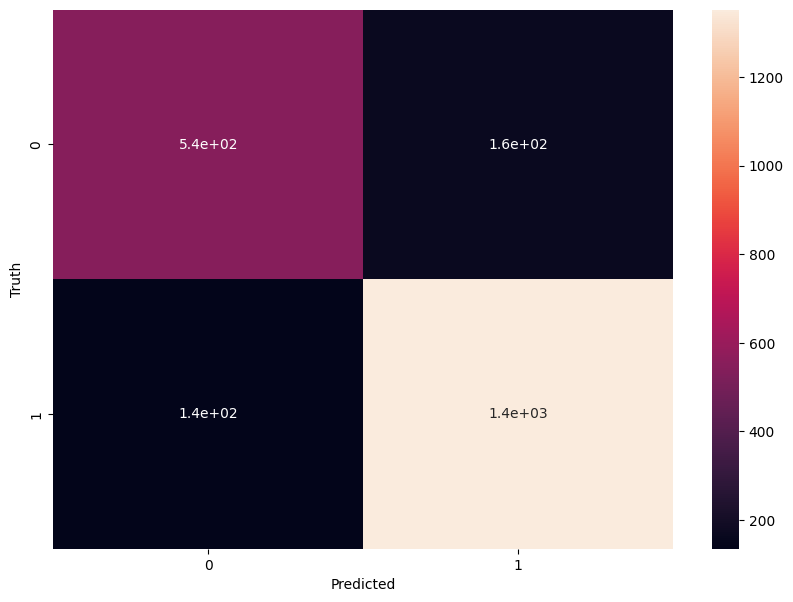

In [28]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

2nd model is SVM.

In [29]:
from sklearn.svm import SVC
svc_model = SVC()

In [30]:
svc_model.fit(X_train, y_train)


SVC()

In [31]:
svc_model.score(X_test, y_test)

0.6774487471526196

Accuracy is only 67%.

In [32]:
y_predicted_svc=svc_model.predict(X_test)

In [33]:
precision_score(y_test, y_predicted_svc, average='macro')


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3387243735763098

In [34]:
recall_score(y_test, y_predicted_svc, average='macro')


0.5

In [35]:
f1_score(y_test, y_predicted_svc, average='macro')

0.40385659967409016

In [36]:
#confusion matrix
from sklearn.metrics import confusion_matrix
svc_cm = confusion_matrix(y_test, y_predicted_svc)
svc_cm

array([[   0,  708],
       [   0, 1487]])

Text(95.72222222222221, 0.5, 'Truth')

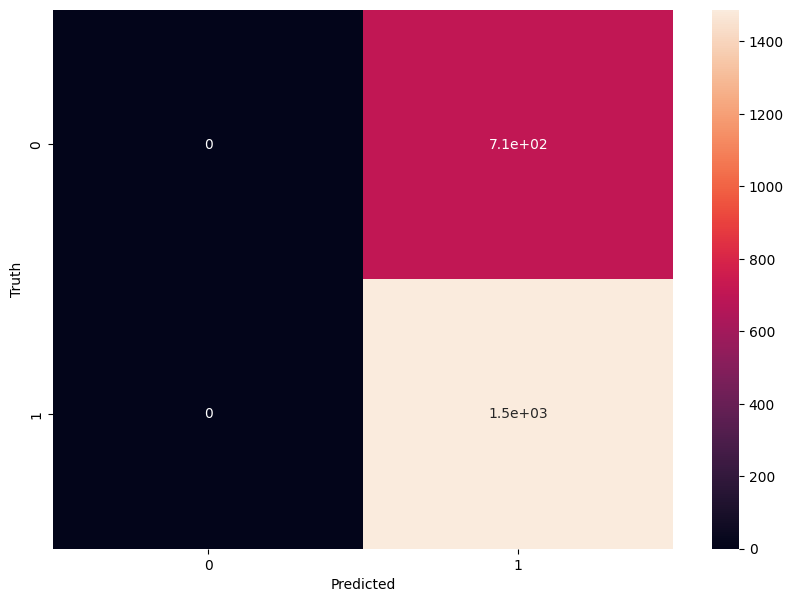

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(svc_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

3rd model is random forest.

In [38]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=20)
forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [39]:
forest_model.score(X_test, y_test)


0.9927107061503417

here accuracy is 99.2%.

In [40]:
y_predicted_forest = forest_model.predict(X_test)


In [41]:
precision_score(y_test, y_predicted_forest, average='macro')


0.9946773120425816

In [42]:
recall_score(y_test, y_predicted_forest, average='macro')


0.9887005649717514

In [43]:
f1_score(y_test, y_predicted_forest, average='macro')

0.9916101290014333

confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix
forest_cm = confusion_matrix(y_test, y_predicted_forest)
forest_cm

array([[ 692,   16],
       [   0, 1487]])

Text(95.72222222222221, 0.5, 'Truth')

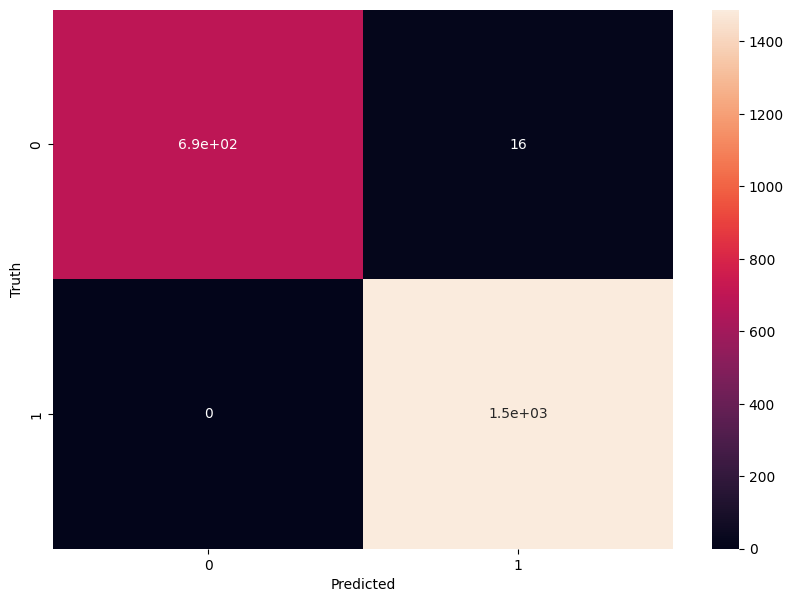

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(forest_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

naive_bayes method

In [46]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()

In [47]:
naive_model.fit(X_test,y_test)

GaussianNB()

In [48]:
naive_model.score(X_test,y_test)

0.6710706150341685

In [49]:
y_predicted_naive=naive_model.predict(X_test)

In [50]:
precision_score(y_test, y_predicted_naive, average='macro')


0.7399061058256575

In [51]:
recall_score(y_test, y_predicted_naive, average='macro')


0.7527897142466347

In [52]:
f1_score(y_test, y_predicted_naive, average='macro')

0.6706220809300454

In [53]:
naive_cm = confusion_matrix(y_test, y_predicted_naive)
naive_cm

array([[696,  12],
       [710, 777]])

Text(95.72222222222221, 0.5, 'Truth')

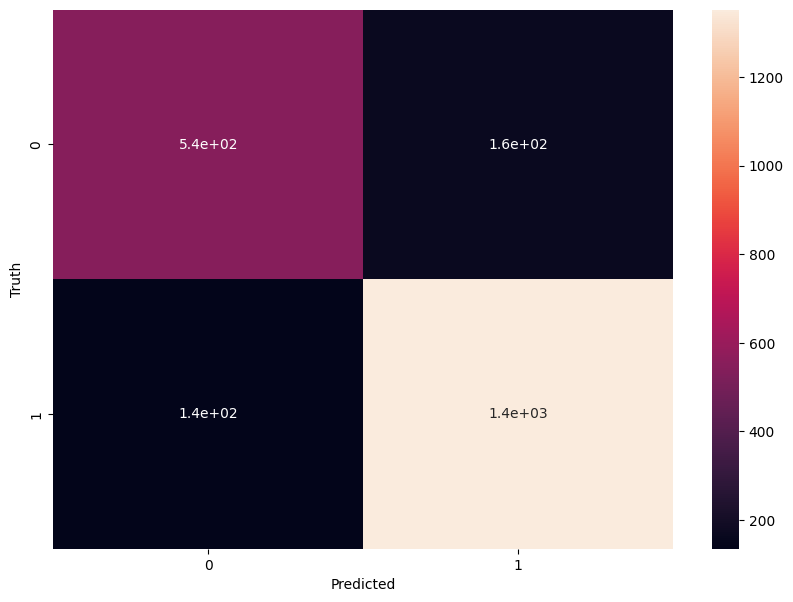

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

At the end best model for this dataframe is random forest method.

We have to save trained model.


In [55]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(model, 'my_trained_model.pkl')
joblib.dump(svc_model,'svc_model.pkl')
joblib.dump(forest_model, 'forest_model.pkl')
joblib.dump(naive_model, 'naive_model.pkl')

['naive_model.pkl']